# O3 Visualizing Data

There are two primary uses for data visualization:
- To explore data
- To communicate data

### matplotlib

A wide variety of tools exist for visualizing data. We will be using the matplotlib library, which is widely used (although sort of showing its age). If you are interested in producing elaborate interactive visualizations for the web, it is likely not the right choice, but for simple bar charts, line charts, and scatterplots, it works pretty well.
As mentioned earlier, matplotlib is not part of the core Python library. With your virtual environment activated (to set one up, go back to “Virtual Environments” and follow the instructions).

We will be using the `matplotlib.pyplot` module. In its simplest use, `pyplot` maintains an internal state in which you build up a visualization
step by step. Once you’re done, you can save it with or display it with .

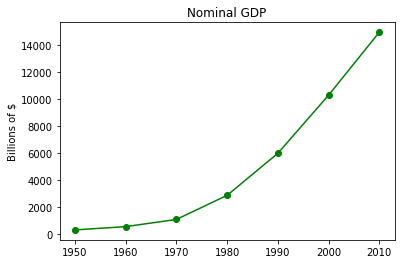

In [2]:
import matplotlib.pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2863.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker = 'o', linestyle='solid')

# add a title
plt.title('Nominal GDP')

# add a label to the y-axis
plt.ylabel('Billions of $')
plt.show()

### Bar Charts

A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items.m

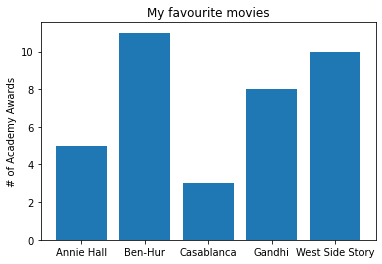

In [5]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi', 'West Side Story']
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left-x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(0, len(movies)), num_oscars)

plt.title('My favourite movies')
plt.ylabel('# of Academy Awards')

# label x-axis with movie names at bar centers
plt.xticks(range(0, len(movies)), movies)

plt.show()

A bar chart can also be a good choice for plotting histograms of bucketed numeric values

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


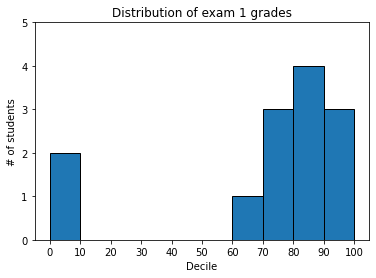

In [10]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# bucket grades by decile, but put 100 in with the 90's
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
print(histogram)

plt.bar(
    x = [x + 5 for x in histogram.keys()],  # shift bars right by 5
    height = histogram.values(),            # give each bar its correct height
    width = 10,                             # five each bar a width of 10
    edgecolor = (0, 0, 0)                   # black edges for each bar
)

plt.axis([-5, 105, 0, 5])                   # x-axis from -5 to 105, y-axis from 0 to 5

plt.xticks([10 * i for i in range(0, 11)])  # x-axis labels at 0, 10, ..., 100
plt.xlabel('Decile')
plt.ylabel('# of students')
plt.title('Distribution of exam 1 grades')
plt.show()

The call to `plt.axis` indicates that we want the x-axis to range
from –5 to 105 (just to leave a little space on the left and right),
and that the y-axis should range from 0 to 5.
And the call to `plt.xticks` puts x-axis labels at 0, 10, 20, ..., 100.

Be judicious when using `plt.axis` . When creating bar charts it is considered especially bad form for your y-axis not to start at 0, since this is an easy way to mislead people

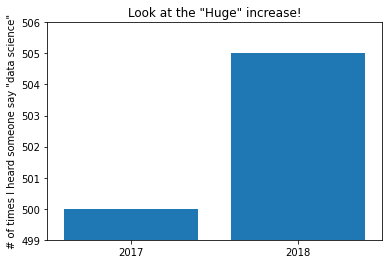

In [15]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(
    x=years,
    height=mentions,
    width=0.8
)
plt.xticks(ticks=years)
plt.ylabel(ylabel='# of times I heard someone say "data science"')

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part aboce 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title('Look at the "Huge" increase!')
plt.show()

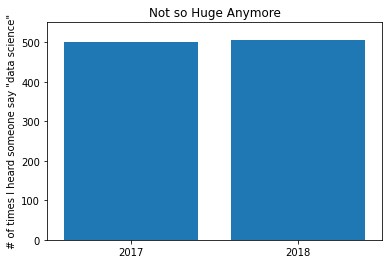

In [17]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(
    x=years,
    height=mentions,
    width=0.8
)
plt.xticks(ticks=years)
plt.ylabel(ylabel='# of times I heard someone say "data science"')

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner
plt.ticklabel_format(useOffset=False)

# we use more sensible axes, and it looks far less impressive:
plt.axis([2016.5, 2018.5, 0, 550])
plt.title('Not so Huge Anymore')
plt.show()

### Line charts

As we saw already, we can make line charts using `plt.plot`. These are a good choice for showing trends

In [20]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, __ in enumerate(variance)]

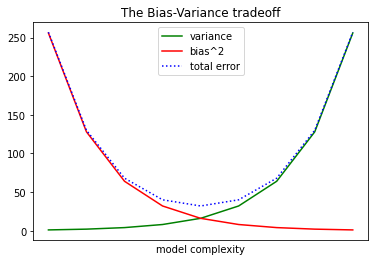

In [21]:
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

# because we've assigned labels to each series
# we can get a legend for free [loc=9 means 'top center']
plt.legend(loc=9)
plt.xlabel('model complexity')
plt.xticks([])
plt.title('The Bias-Variance tradeoff')
plt.show()

### Scatterplots


A scatterplot is the right choice for visualizing the relationship between two paired sets of data

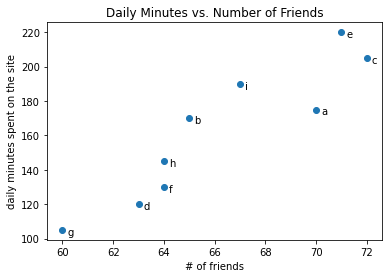

In [23]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(
        label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points'
    )

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

If we include a call to `plt.axis('equal'`
, the plot more accurately shows that most of the variation occurs on test 2.


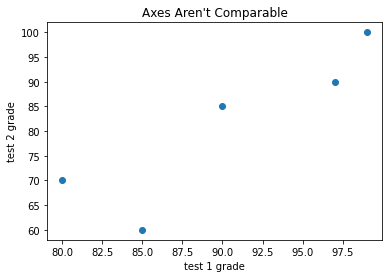

In [25]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

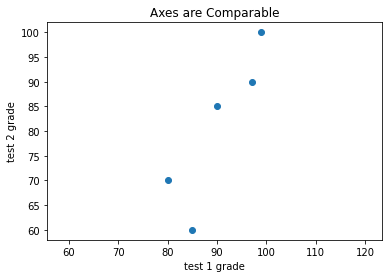

In [27]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis('equal')
plt.show()